# Cricketer Virat Kohli is among the most well-known athletes in the world. A dataset of all of Virat Kohli's One-Day International games from 18 August 2008 to 22 January 2017 is provided here. It is necessary for you to evaluate Virat Kohli's ODI game performance.

# Below is the complete information about all the columns in the dataset:


In [9]:
import numpy as np
import pandas as pd

In [5]:
odi_df = pd.read_csv("Virat_Kohli_ODI.csv")
odi_df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [6]:
odi_df.tail()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
127,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,26-Oct-16
128,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17
130,8,6,5,2,0,160,3,caught,1,v England,Cuttack,19-Jan-17
131,55,81,63,8,0,87.3,3,caught,2,v England,Kolkata,22-Jan-17


In [7]:
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [8]:
# Checking missing values for 'Mins'
odi_df[odi_df['Mins']=="-"]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
10,107,-,114,11,1,93.85,4,caught,2,v Sri Lanka,Kolkata,24-Dec-09
13,31,-,46,1,0,67.39,5,caught,1,v South Africa,Jaipur,21-Feb-10
14,57,-,71,4,1,80.28,3,caught,2,v South Africa,Ahmedabad,27-Feb-10
51,86*,-,99,11,0,86.86,4,not out,2,v England,Mumbai,23-Oct-11
105,49,-,44,2,2,111.36,4,caught,2,v Sri Lanka,Ahmedabad,6-Nov-14
106,53,-,61,4,1,86.88,4,caught,2,v Sri Lanka,Hyderabad (Deccan),9-Nov-14


In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
# Calculating average minutes per ball to use it for filling missing values in 'Mins' column
temp_df = odi_df[odi_df['Mins']!="-"]
temp_df['Mins'] = temp_df['Mins'].astype(int)
temp_arr = temp_df.agg({'Mins':'sum', 'BF':'sum'}).values
avg_min_per_ball = temp_arr[1]/temp_arr[0]

In [14]:
# Impute missing values in 'Mins' columns by 'BF'*avg_min_per_ball
odi_df['Mins'] = odi_df[['Mins','BF']].apply(lambda x: int(x[1]*avg_min_per_ball) if x[0]=='-' else int(x[0]), axis=1)

In [15]:
# Create a new boolean column 'Not Out'
odi_df['Not Out'] = odi_df['Runs'].apply(lambda x: 'Yes' if '*' in x else 'No')

In [16]:
# Convert datatype of 'Runs' column to integer
odi_df['Runs'] = odi_df['Runs'].apply(lambda x: int(x[:-1]) if '*' in x else int(x))

In [17]:
# Convert datatype of 'Start Date' to datetime
odi_df['Start Date'] = pd.to_datetime(odi_df['Start Date'])
# Create a new column 'Quarter' from 'Start Date'
odi_df['Quarter'] = odi_df['Start Date'].dt.quarter
# Create a new column 'Year' from 'Start Date'
odi_df['Year'] = odi_df['Start Date'].dt.year

In [18]:
# Checking for missing values in Strike Rate
odi_df[odi_df['SR']=="-"]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
15,0,3,0,0,0,-,3,run out,1,v Zimbabwe,Bulawayo,2010-05-28,No,2,2010


In [19]:
# Imputing Strike Rate with 0 since for that match Virat got out at 0 and converting it to float type
odi_df[odi_df['SR']=="-"] = 0
odi_df['SR'] = odi_df['SR'].astype(float) 

In [20]:
# Removing row with all Null values
odi_df[odi_df['Year']==0]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
15,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0


In [21]:
odi_df = odi_df[odi_df['Year']!=0]

In [22]:
# Assignment Questions
#1. Using the data set, find out the country against which Virat Kohli has the maximum batting average. 
#Here, the batting average is given by (total number of runs Virat scored)/(the total number of matches he played) 
#and not the average runs Virat Kohli scored before getting out.

In [23]:
odi_df.groupby('Opposition').agg({'Runs' : 'sum', 'Opposition':'count'}).head()

,Runs,Opposition
Opposition,,
v Australia,999,20
v Bangladesh,544,8
v England,830,21
v Ireland,34,1
v Netherlands,12,1


In [24]:
dict1 = {}
for i in odi_df.index:   
    runs = odi_df.loc[i].Runs
    country = odi_df.loc[i].Opposition
    if country not in dict1:
        dict1[country] = [runs, 1]
    else:
        dict1[country] = [dict1[country][0]+runs, dict1[country][1]+1]    
dict1

{'v Sri Lanka': [1084, 24],
 'v Australia': [999, 20],
 'v Bangladesh': [544, 8],
 'v South Africa': [558, 15],
 'v Zimbabwe': [215, 4],
 'v New Zealand': [877, 14],
 'v Ireland': [34, 1],
 'v Netherlands': [12, 1],
 'v West Indies': [1009, 19],
 'v Pakistan': [22, 4],
 'v England': [830, 21]}

In [25]:
max = 0
team = ''
for k,v in dict1.items():
    avg = v[0]/v[1]
    if avg> max:
        max = avg
        team = k
max,team

(68.0, 'v Bangladesh')

In [26]:
# Virat Kohli has the maximum batting average against Bangladesh.

In [27]:
#2. Plot a histogram to see where Virat Kohli has scored the most number of times.

In [33]:
import matplotlib.pyplot as plt

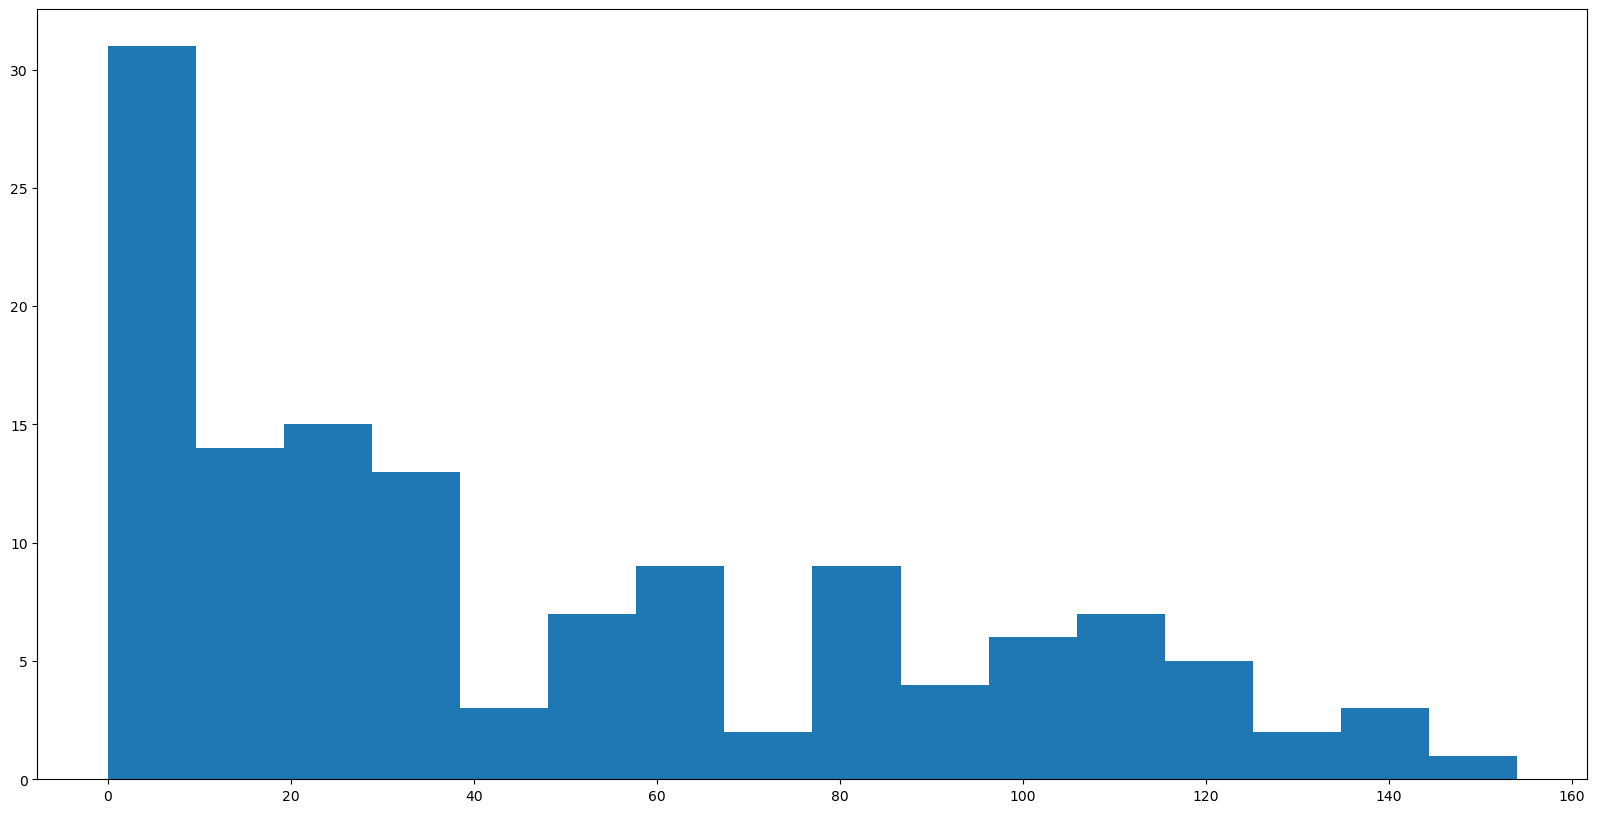

In [34]:
runs= odi_df['Runs']
plt.figure(figsize = (20,10))
plt.hist(runs, bins = 16)
plt.show()

In [35]:
# 3. Whenever Virat Kohli has scored 90-100 runs (exclude 100), what has been the average strike rate?

In [36]:
avg_list = []
for i in odi_df.index:
    row = odi_df.loc[i]
    runs = row['Runs']
    if runs >= 90 and runs <100:
        avg_list.append(float(row['SR']))       
avg_sr = sum(avg_list)/ len(avg_list)
avg_sr

93.1

In [37]:
#4. Using the previous histogram, find the run interval where Virat has scored the maximum number of sixes. 
#Also, mention the number of fours he hit in the same bracket.

In [38]:
runs= odi_df['Runs']
group_bin = [i//10 for i in runs]
odi_df['Group_Size'] = group_bin
df1 = odi_df.groupby('Group_Size').sum().reset_index()
df1.head()
max_six = 0
for i in df1.index:
    row = (df1.iloc[i])
    six_run = row['6s']
    if max_six<six_run:
        max_six = six_run
        max_four = row['4s']
        group_int = row['Group_Size']
max_six, max_four, group_int

(14.0, 90.0, 10.0)

In [39]:
# In Group 10 i.e; 100,110 runs Kohli hit 14 Sixes and 90 Fours

In [40]:
# 5. Plot a pie chart to find out the approximate percentage of the times Virat Kohli has been out by LBW in all his innings. 
#Take into account all his innings, including the ones in which he remained not out.

In [41]:
df2= odi_df[['Dismissal','Runs']].groupby('Dismissal').count()
lbw_count = df2.loc['lbw'].values[0]
total = df2.Runs.sum()
lbw_count, total

(9, 131)

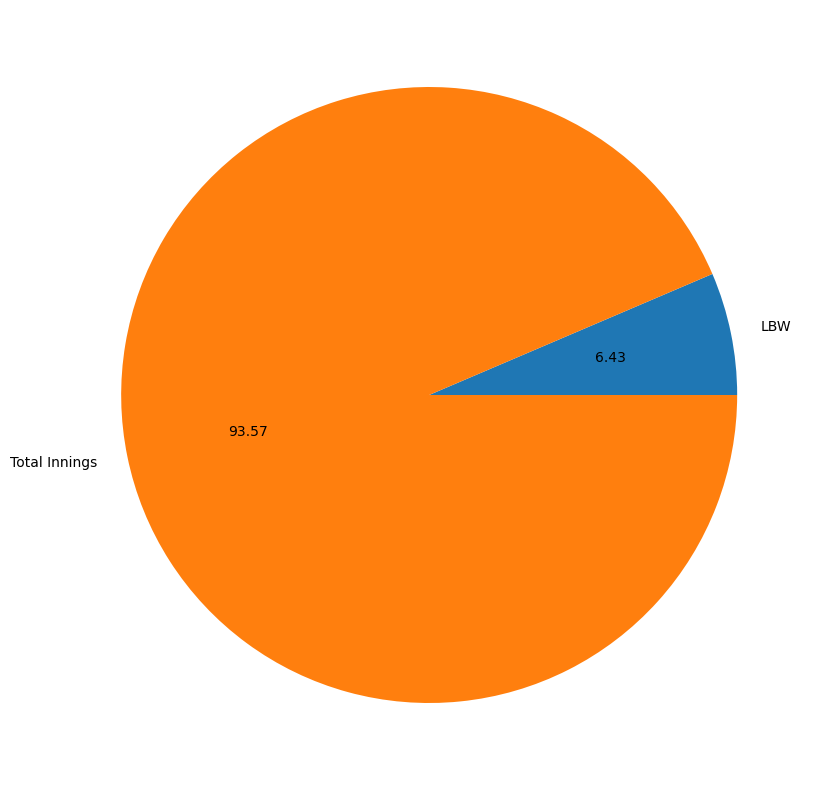

In [42]:
plt.figure(figsize = (10,10))
plt.pie(x = [lbw_count,total],labels= ['LBW','Total Innings'] ,autopct='%.2f')
plt.show()

In [43]:
#6. Let’s say you want to visualize the consistency of the runs scored by Virat against various teams, 
#i.e. you want to compare the spread of the runs scored by Virat against various teams. Which of the following plots will 
#be the most appropriate for visualizing this?

In [46]:
import seaborn as sns

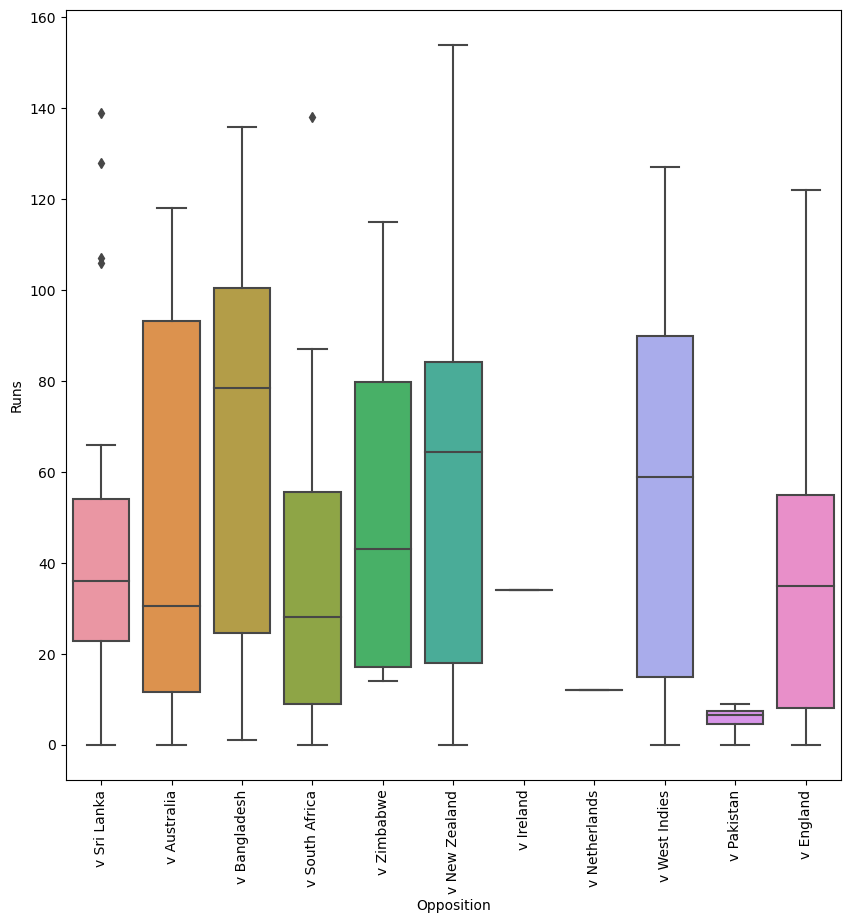

In [47]:
plt.figure(figsize = (10,10))
sns.boxplot(x= 'Opposition', y = 'Runs', data = odi_df)
plt.xticks(rotation = 90)
plt.show()

In [48]:
#7. In which years have Kohli’s runs kept improving in the Q2-Q4 period given that he played at least one match in that period?

In [49]:
temp_df = odi_df[odi_df['Quarter'].isin([1,2,3,4])].groupby(['Year','Quarter']).agg({'Runs':'sum', 'Inns':'sum'}).apply(lambda x: x[0]/x[1], axis=1).reindex()

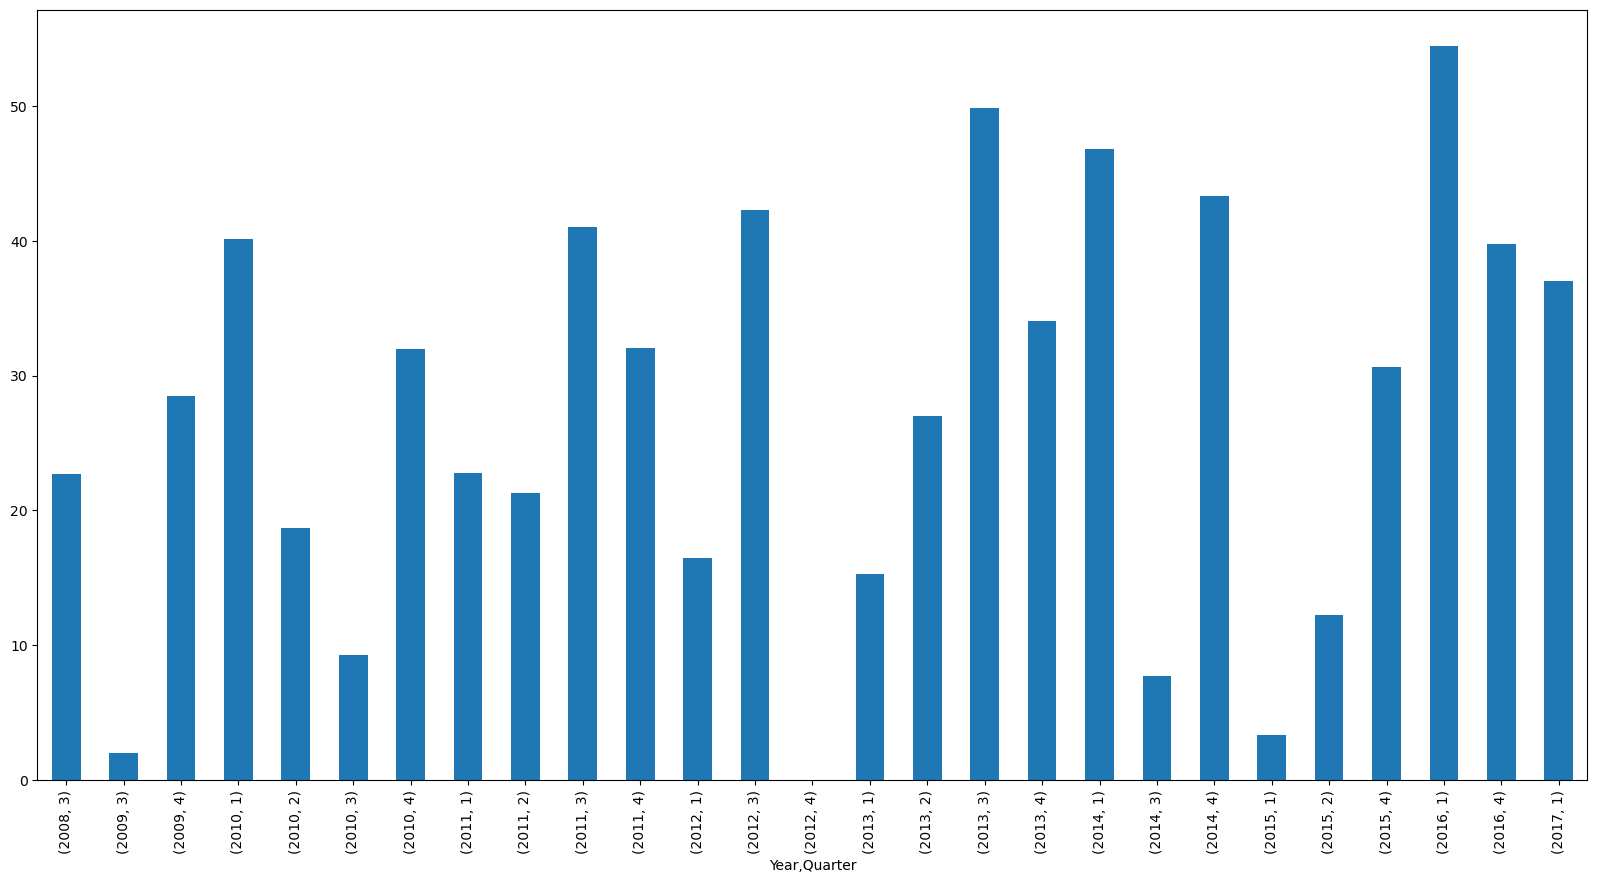

In [50]:
temp_df.plot(kind='bar', figsize = (20,10))
plt.show()

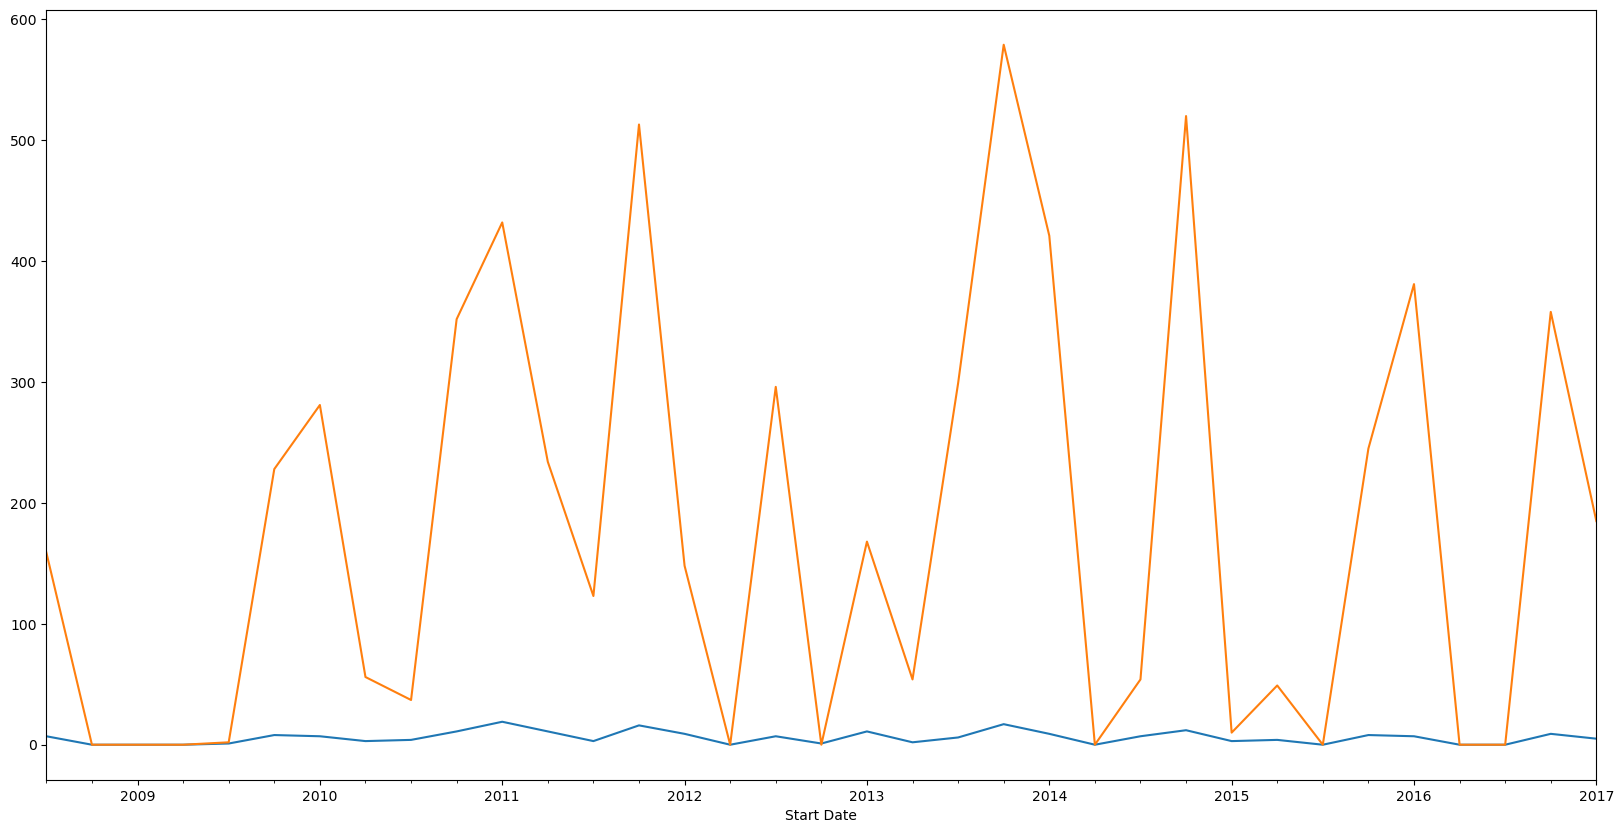

In [51]:
df3 = odi_df[['Start Date','Inns','Runs']]
df3.index = df3['Start Date']
df4  = df3.resample('Q', convention='end').agg('sum')
plt.figure(figsize = (20,10))
df4['Inns'].plot( kind = 'line')
df4['Runs'].plot( kind = 'line')
plt.show()

In [52]:
# For year 2014 and 2015 we can observe there is continuous improvement towards Q4.

In [53]:
#8. Against which country has Virat scored the maximum aggregate runs in matches where the mode of dismissal was “caught”?

In [54]:
odi_df[odi_df['Dismissal']=='caught'].groupby('Opposition').agg({'Runs':'sum', 'Inns':'sum'}).apply(lambda x: x[0]/x[1], axis=1).idxmax()

'v West Indies'

In [55]:
# Virat scored the maximum aggregate runs in matches against West Indies where the mode of dismissal was “caught

In [56]:
#9. What is the batting position at which Virat has the best average against England?

In [57]:
# Calculating average 
odi_df[odi_df['Opposition']=='v England'].groupby('Pos').agg({'Runs':'sum', 'Inns':'sum'}).apply(lambda x: x[0]/x[1], axis=1)

Pos
3    19.863636
4    39.300000
dtype: float64

In [58]:
# Finding batting position
odi_df[odi_df['Opposition']=='v England'].groupby('Pos').agg({'Runs':'sum', 'Inns':'sum'}).apply(lambda x: x[0]/x[1], axis=1).idxmax()

4

In [59]:
#Virat has best average against England at 4th Batting position